In [1]:
# Import Modules from the Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Let's create some data

In [2]:
# Seed of the Random Number Generator
np.random.seed(1001)

In [3]:
# Data Generating Function
def f(x, sigma):
    return 0.3*x - 0.73 + np.random.randn(x.shape[-1])*sigma

In [4]:
# Training Data
N_data = 100
x_data = np.random.rand(N_data)*10
y_data = f(x_data, 0.2)

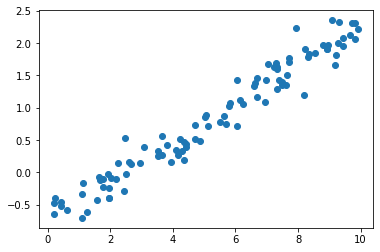

In [5]:
plt.plot(x_data, y_data, 'o')

### Now, let's sample some random model parameters from a normal distribution

In [6]:
N_model = 50

W = np.random.randn(2, N_model)
W[0, :] = W[0, :]* 0.1 # linear term
W[1, :] = W[1, :]* 0.5   # constant term

In [7]:
W[0].std(), W[1].std(), W[0].mean(), W[1].mean()

(0.09720287356572616,
 0.48576320096475284,
 -3.92687844742437e-05,
 -0.029405119453685787)

Hint:

$x \sim \mathcal{N}(\mu, \sigma^2)$

is equivalent to

$x = \mu + \sigma \cdot z, \qquad z \sim \mathcal{N}(0, 1)$

### Calculate the y-values...

In [8]:
x = np.linspace(0, 10, 101)
X = np.vander(x, 2)

In [9]:
W.shape, X.shape

((2, 50), (101, 2))

In [10]:
y = X @ W

In [11]:
y.shape

(101, 50)

### ... and visualize the result:

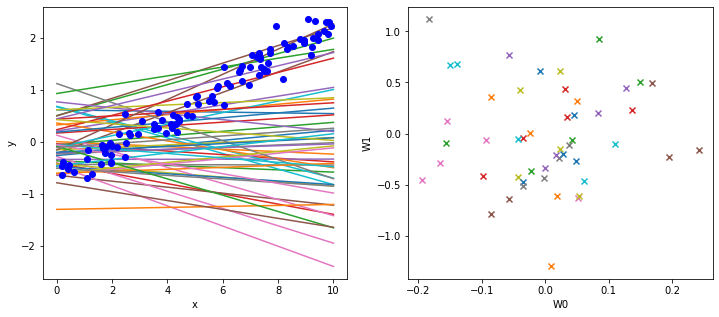

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[1].plot([0], [0])

for i in range(N_model):
    ax[0].plot(x, y[:,i], label=f"{i}")
    ax[1].scatter(W[0,i], W[1,i], marker="x", label=f"{i}")

ax[0].plot(x_data, y_data, 'o', color="blue")
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")
ax[1].set_xlabel("W0")
ax[1].set_ylabel("W1")

if N_model <= 10:
    ax[0].legend()
    ax[1].legend()

### Let's assume a simple error model for our data:

\begin{equation}
t = y(x,w) + \epsilon
\end{equation}

\begin{equation}
\epsilon \sim \mathcal{N}(0, s^2 \mathbb{I}), \qquad s^2 \mathbb{I} = S
\end{equation}




\begin{equation}
p(t | x, w, S) = \mathcal{N}(t| y(x,w), S)
\end{equation}

### Can you calculate the likelihood of the data given the sampled model parameters?

In [13]:
logProb_data = np.zeros((N_data, N_model))

In [14]:
s = 1.

for i_model in range(10):
    for j_data in range(N_data):
        logProb_data[j_data, i_model] = 0. # ???